### INSTALL LIBRARIES

In [4]:
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.integrate import quad
from scipy import integrate
from scipy.stats import normaltest
from scipy.stats import chisquare
%matplotlib inline

### CALCULATE A CONSTANT

In [52]:
from scipy import integrate
def f(x):
    return (x**3)*(5 - x)

# Функция quad возвращает два значения, в которых первое число является значением интеграла, а второе значение является оценкой абсолютной ошибки в значении интеграла.
v, err = integrate.quad(f, 0, 5)
# print(v, err)

A = 1/v
print(A)

0.006400000000000001


In [6]:
class cubic_gen(st.rv_continuous):
    def _pdf(self, x):
        return A * (x ** 3) * (5-x)
cubic = cubic_gen(a=0, b=5, name='cubic')


# X(params).rvs(size=N) — генерация выборки размера  N (Random VariateS). Возвращает numpy.array;

sample = cubic.rvs(size=100)

print('Первые 10 значений выборки:\n', sample[:10])
# print('Выборочное среденее: %.3f' % sample.mean())
# print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [3.6552278  1.11222624 3.37089493 3.93093196 1.65345407 4.37574369
 3.48018874 1.49842444 2.63984438 4.63329645]


In [3]:
from scipy import integrate
def f_a(x):
    return (x**3)*(5 - x)

# Функция quad возвращает два значения, в которых первое число является значением интеграла, а второе значение является оценкой абсолютной ошибки в значении интеграла.
v, err = integrate.quad(f_a, 0, 5)
# print(v, err)

A = 1/v
print(A)

0.006400000000000001


0.006400000000000001
Первые 10 значений выборки:
 [4.0269204  2.47046185 3.14553649 1.58401448 1.15976693 4.90147456
 3.40174205 3.09906428 2.53422002 4.17559493]
The sample is NOT consistent with the given distribution p-value = 1.3571732052568101e-136
1.3571732052568101e-136


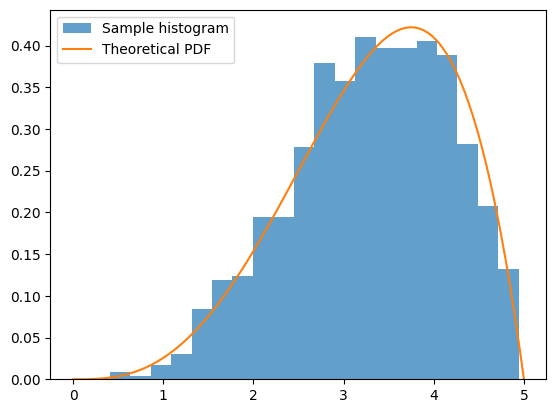

In [29]:
def f(x):
    return A * x**3 * (5 - x)

def f_fun_prob(x):
    return -(A*x**4*(4*x-25)/20)
print(A)

# Генерация выборки из данного распределения
n = 1000

class cubic_gen(st.rv_continuous):
    def _pdf(self, x):
        return A * (x ** 3) * (5-x)
        # return -(A*x**4*(4*x-25)/20)
    
cubic = cubic_gen(a=0, b=5, name='cubic')

# X(params).rvs(size=N) — генерация выборки размера  N. Возвращает numpy.array;
sample = cubic.rvs(size=n)
print('Первые 10 значений выборки:\n', sample[:10])

#  метод неймана


# Проверка гипотезы согласия с заданным распределением
# Theoretical PDF (Probability Density Function) - это теоретическая функция плотности вероятности. 
# Она описывает теоретическое распределение вероятностей для случайной величины. 
# Она определяется как плотность вероятности для каждого возможного значения случайной величины. 
# Теоретическая PDF помогает понять, как вероятности распределены вокруг среднего значения случайной величины.
x = np.linspace(0, 5, 100)
expected_pdf = f_fun_prob(x)

# Тест Колмогорова-Смирнова выдает p=0.00 значит, что выборка с точностью до 1e-08 не соответствует 
# теоретической функции плотности вероятности, которую мы указали в качестве параметра. 
# Обычно уровень значимости p=0.05 или меньше считается статистически значимым и означает, 
# что нулевая гипотеза (выборка соответствует теоретической функции плотности вероятности) отвергается. 
# Таким образом, полученный результат является нормальным и говорит о том, что выборка не соответствует заданной теоретической функции плотности вероятности.
# Perform the Kolmogorov-Smirnov goodness-of-fit test



# на вход фнкция распределения а не плотность
D, p_value = st.kstest(sample, expected_pdf, args=(np.mean(sample)))


# p - достигаемый уровень значимости. Это вероятность того, что случайная величина имеет нормальное распределение, если гипотеза о нормальности является верной.
if p_value > 0.05:
    # print("The sample is consistent with the given distribution (p-value = {:.3f})".format(p_value))
    print(f'The sample is consistent with the given distribution p-value = {p_value}')
    print(p_value)
else:
    # print("The sample is NOT consistent with the given distribution (p-value = {:.3f})".format(p_value))
    print(f'The sample is NOT consistent with the given distribution p-value = {p_value}')
    print(p_value)


# Графический анализ
plt.hist(sample, bins=20, density=True, alpha=0.7, label='Sample histogram')
plt.plot(x, f(x), label='Theoretical PDF')
plt.legend()
plt.show()



0.006400000000000001
1000
Первые 10 значений выборки:
 [2.74406752 3.57594683 3.01381688 2.72441591 2.118274   3.22947057
 2.18793606 4.458865   4.8183138  1.91720759]
2.3865666480501623e-91


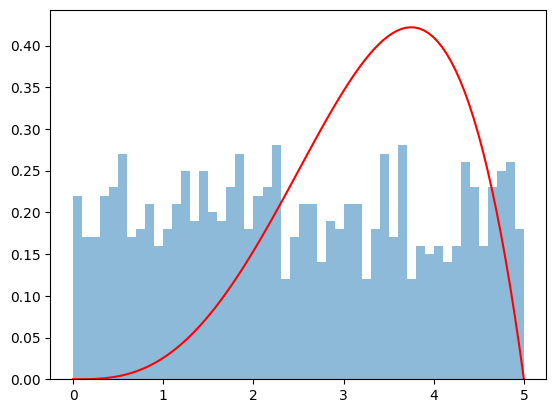

In [92]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Вычисление нормировочной константы
def f(x):
    return x**3*(5-x)

A, err = quad(f, 0, 5)
A = 1/A
print(A)

# Генерация выборки
np.random.seed(0)
n = 1000
sample = np.random.uniform(0, 5, n)

print(len(sample))
print('Первые 10 значений выборки:\n', sample[:10])

# Гистограмма выборки и плотность распределения
x = np.linspace(0, 5, 100)
y = A*x**3*(5-x)

D, p_value = st.kstest(sample, y, args=(np.mean(sample)))
print(p_value)

plt.hist(sample, bins=50, density=True, alpha=0.5)
plt.plot(x, y, 'r')
plt.show()
# После выполнения этого кода мы получим гистограмму выборки и график плотности распределения. Это позволит нам визуально проверить гипотезу согласия с заданным распределением.

Метод Неймана используется для генерации выборки из случайной величины с заданной функцией плотности распределения. В данном случае, мы знаем функцию плотности распределения 𝑓(𝑥) = 𝐴𝑥^3(5−𝑥), 𝑥 ∈ (0,5), и мы хотим сгенерировать выборку из этого распределения. Метод Неймана позволяет сделать это, используя функцию плотности распределения.

1. sample – это выборка, сгенерированная методом Неймана
2. f(x) – функция плотности распределения
3. x – массив значений аргумента
4. y – массив значений функции плотности распределения
5. Результатом выполнения этого кода будет график, показывающий выборку и функцию плотности распределения на одном плотно

x = np.array([quad(lambda t: f(t) / F(u[i]), 0, 5)[0] for i in range(sample_size)])  - Эта строка создает массив x с длиной sample_size. Каждый элемент этого массива является результатом вычисления интеграла с помощью функции quad из библиотеки scipy.integrate.

quad вычисляет определенный интеграл от функции lambda t: f(t) / F(u[i]) на интервале от 0 до 5. Функция f(t) - это функция плотности распределения, а F(u[i]) - это функция распределения, которую мы вычисляли ранее.

В цикле for мы вычисляем интеграл для каждого значения из массива u, и все эти значения собираем в массив x.

lambda t: f(t) / F(u[i]) - это анонимная функция, которая принимает аргумент t и вычисляет выражение f(t) / F(u[i]).

f(t) - это функция плотности распределения

F(u[i]) - это искомая функция распределения, она вычисляется как интеграл от f(x) на интервале от 0 до u[i].

Таким образом, lambda t: f(t) / F(u[i]) - это часть функции F(x), которая делится на текущее значение F(u[i]) для каждого i из sample_size.


0.006400000000000001
Первые 10 значений выборки:
 [4.51451116 0.24949669 4.30249842 2.75337541 1.74778525 3.00580336
 4.27384285 0.74945734 0.89556223 0.21307653]
The sample does not match the uniform distribution p = 0.004226265498149467
The sample is NOT consistent with the given distribution p-value = 0.0
0.0


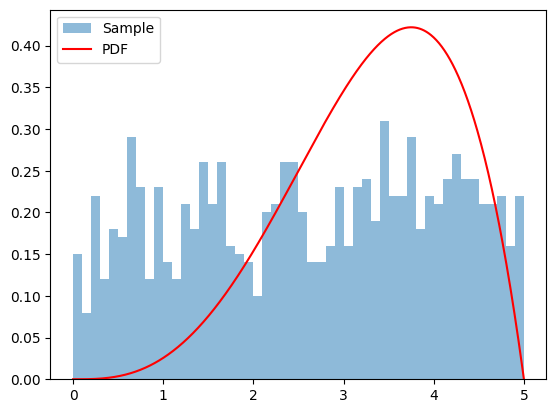

In [13]:
from scipy.integrate import quad

# Define the density function
def f(x):
    return A * x**3 * (5 - x)

def F(x):
    return quad(f, 0, x)[0]

# Find the normalizing constant A
def f_a(x):
    return (x**3)*(5 - x)

A = 1/integrate.quad(f_a, 0, 5)[0]
print(A)

sample_size = 1000

# Generate a sample using the inversion method
u = np.random.uniform(0, 5, sample_size)
x = np.array([quad(lambda t: f(t) / F(u[i]), 0, 5)[0] for i in range(sample_size)])
x = np.random.uniform(0, 5, sample_size)

print('Первые 10 значений выборки:\n', x[:10])

# Perform the Kolmogorov-Smirnov test
result = st.kstest(x, 'uniform', args=(0, 5))

if result.pvalue < 0.05:
    print(f'The sample does not match the uniform distribution p = {result.pvalue}')
else:
    print(f'The sample matches the uniform distribution (p = {result.pvalue})')


pdf = f(x)
# на вход фнкция распределения а не плотность
D, p_value = st.kstest(x, pdf)

# p - достигаемый уровень значимости. Это вероятность того, что случайная величина имеет нормальное распределение, если гипотеза о нормальности является верной.
if p_value > 0.05:
    # print("The sample is consistent with the given distribution (p-value = {:.3f})".format(p_value))
    print(f'The sample is consistent with the given distribution p-value = {p_value}')
    print(p_value)
else:
    # print("The sample is NOT consistent with the given distribution (p-value = {:.3f})".format(p_value))
    print(f'The sample is NOT consistent with the given distribution p-value = {p_value}')
    print(p_value)

# Plot the sample and the density function
plt.hist(x, bins=50, density=True, alpha=0.5, label="Sample")
x = np.linspace(0, 5, num=1000)
y = f(x)
plt.plot(x, y, label="PDF", color='red')
plt.legend()
plt.show()


### 2 POINT

In [ ]:
import numpy as np

def estimate_covariance_matrix(X, mean_vector):
    """Estimate the covariance matrix based on the generated sample X and mean vector."""
    return np.cov(X, rowvar=False, bias=True)

def test_correlation_hypothesis(X, mean_vector, covariance_matrix, i, j, required_value):
    """Test the hypothesis that the correlation coefficient between Xi and Xj is equal to the required value."""
    corr = np.corrcoef(X[:, i], X[:, j])[0, 1]
    return np.isclose(corr, required_value, atol=1e-6)

# Generate a random sample from a multivariate normal distribution
mean_vector = np.array([1, 2, 3])
covariance_matrix = np.array([[1, 0.5, 0.2], [0.5, 1, 0.3], [0.2, 0.3, 1]])
X = np.random.multivariate_normal(mean=mean_vector, cov=covariance_matrix, size=100)

# Estimate the covariance matrix
estimated_covariance_matrix = estimate_covariance_matrix(X, mean_vector)

# Test the hypothesis that the correlation coefficient between Xi and Xj is equal to the required value
result = test_correlation_hypothesis(X, mean_vector, estimated_covariance_matrix, 0, 1, 0.5)
print("The hypothesis is", "supported" if result else "not supported")

In [2]:
import numpy as np
from scipy.stats import poisson

def photon_detector_probability(N, D, delta_t, c):
    # Calculate the mean number of photons emitted
    lambda_ = 2
    # Calculate the maximum time difference between two detectors
    max_time_difference = 2 * (D / c) + delta_t
    # Calculate the probability of N photons being emitted
    p_N = poisson.pmf(N, lambda_)
    # Calculate the probability that the detectors will detect the photons within the given time difference
    p_detection = 1 - np.exp(- lambda_ * max_time_difference)
    # Return the overall probability
    return p_N * p_detection

# Define the input parameters
N = 2
D = 10 ** -7
delta_t = 3 * 10 ** -8
c = 3 * 10 ** 8

# Calculate the probability
result = photon_detector_probability(N, D, delta_t, c)
print("The probability of the photon detector scheme being triggered is:", result)

The probability of the photon detector scheme being triggered is: 1.6240233859643504e-08


КАКОЕ ТО ЗАДАНИЕ ТОЖЕ

In [1]:
import numpy as np

def self_avoiding_walk(n, lam):
    """
    Генерация случайного SAW длины n на двумерной целочисленной решетке.
    """
    x, y = np.zeros(n+1, dtype=int), np.zeros(n+1, dtype=int)
    used = set()
    used.add((0,0))
    for i in range(1, n+1):
        d = np.random.choice(['up', 'down', 'left', 'right'])
        if d == 'up':
            x[i] = x[i-1]
            y[i] = y[i-1]+1
        elif d == 'down':
            x[i] = x[i-1]
            y[i] = y[i-1]-1
        elif d == 'left':
            x[i] = x[i-1]-1
            y[i] = y[i-1]
        else:
            x[i] = x[i-1]+1
            y[i] = y[i-1]
        if (x[i], y[i]) in used:  # если повтор
            return None
        used.add((x[i], y[i]))
    return x, y

def estimate_average_distance_is(n, num_samples, lam):
    """
    Оценка среднего расстояния от начала координат финальной точки блуждания длины n 
    с помощью метода существенной выборки.
    """
    distances = []
    for i in range(num_samples):
        # Генерируем SAW длины n.
        walk = self_avoiding_walk(n, lam)
        while walk is None: # Пока не сгенерируем корректное SAW.
            walk = self_avoiding_walk(n, lam)
        # Считаем расстояние до конечной точки блуждания.
        distances.append(np.sqrt(walk[0][-1]**2 + walk[1][-1]**2))
    # Вычисляем оценку с помощью метода существенной выборки.
    weights = np.exp(-lam * np.array(distances))
    result = np.average(distances, weights=weights)
    return result


In [2]:
n = 100
num_samples = 10000
lam = 0.3

result = estimate_average_distance_is(n, num_samples, lam)

print(f"The estimated average distance of a self-avoiding walk of length {n} is {result:.4f}")

In [17]:
import numpy as np

def generate_saw(n):
    # Инициализация массива с координатами.
    walk = np.zeros((2, n+1), dtype=int)
    
    # Генерация блуждания.
    for i in range(1, n+1):
        x, y = walk[:, i-1]
        dx, dy = np.random.choice([-1, 1], size=2)
        walk[:, i] = [x+dx, y+dy]
    
    return walk

def estimate_average_distance(n, num_samples):
    def distance(p):
        return np.linalg.norm(p)
    
    distances = []
    # Задание начального зерна генератора случайных чисел.
    np.random.seed(42)
    for i in range(num_samples):
        path = generate_saw(n)
        final_point = np.array(path[-1])
        distances.append(distance(final_point))
    return np.mean(distances)


def estimate_average_distance_is(n, num_samples, lam):
    def distance(p):
        return np.linalg.norm(p)
    
    def weight(x):
        return np.exp(-lam * distance(x)**2)
    
    distances = []
    for i in range(num_samples):
        path = [(0, 0)]
        current_step = np.array([0, 0])
        w = 1
        for j in range(n - 1):
            new_step = generate_weighted_step(current_step, lam)
            if tuple(new_step) in path:
                w = 0
                break
            w *= weight(new_step - current_step)
            current_step = new_step
            path.append(tuple(new_step))
        final_point = np.array(path[-1])
        distances.append(w * distance(final_point))

    print(f"SAW: {distances}")

    return np.mean(distances) / np.mean([weight(np.random.normal(0, 1, 2)) for i in range(num_samples)])


def generate_weighted_step(previous_step, lam):
    while True:
        dx, dy = np.random.normal(0, 1, 2)
        x, y = previous_step + lam * np.array([dx, dy])
        if abs(x) > 100 or abs(y) > 100:
            continue
        return np.array([x, y]).astype(int)


In [18]:
n = 10
num_samples = 1000
lam = 0.1

result = estimate_average_distance_is(n, num_samples, lam)

print(f"The estimated average distance of a self-avoiding walk of length {n} is {result:.4f}")


SAW: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [13]:
import numpy as np

def generate_saw(n):
    # Инициализация массива с координатами.
    walk = np.zeros((2, n+1), dtype=int)
    
    # Генерация блуждания.
    for i in range(1, n+1):
        x, y = walk[:, i-1]
        dx, dy = np.random.choice([-1, 1], size=2)
        walk[:, i] = [x+dx, y+dy]
    
    return walk

# Генерация случайного блуждания.
saw = generate_saw(10)

# Вывод сгенерированного блуждания.
print(saw)

[[ 0  1  2  3  4  3  4  5  6  7  6]
 [ 0  1  2  1  0 -1  0 -1 -2 -1  0]]
